In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("datasett.csv")

In [3]:
df.head(10)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,04-10-2016 07:59
1,BHMBCCMKT01,577,64,04-10-2016 08:25
2,BHMBCCMKT01,577,80,04-10-2016 08:59
3,BHMBCCMKT01,577,107,04-10-2016 09:32
4,BHMBCCMKT01,577,150,04-10-2016 09:59
5,BHMBCCMKT01,577,177,04-10-2016 10:26
6,BHMBCCMKT01,577,219,04-10-2016 10:59
7,BHMBCCMKT01,577,247,04-10-2016 11:25
8,BHMBCCMKT01,577,259,04-10-2016 11:59
9,BHMBCCMKT01,577,266,04-10-2016 12:29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [5]:
df.shape

(35717, 4)

In [6]:
df.isnull().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
LastUpdated         0
dtype: int64

In [7]:
df["LastUpdated"]=pd.to_datetime(df["LastUpdated"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
df["Date"]=df["LastUpdated"].dt.date
df["Time"]=df["LastUpdated"].dt.time

In [10]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Date,Time
0,BHMBCCMKT01,577,61,2016-04-10 07:59:00,2016-04-10,07:59:00
1,BHMBCCMKT01,577,64,2016-04-10 08:25:00,2016-04-10,08:25:00
2,BHMBCCMKT01,577,80,2016-04-10 08:59:00,2016-04-10,08:59:00
3,BHMBCCMKT01,577,107,2016-04-10 09:32:00,2016-04-10,09:32:00
4,BHMBCCMKT01,577,150,2016-04-10 09:59:00,2016-04-10,09:59:00


In [11]:
df.drop(["LastUpdated","SystemCodeNumber","Capacity"],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Occupancy  35717 non-null  int64 
 1   Date       35717 non-null  object
 2   Time       35717 non-null  object
dtypes: int64(1), object(2)
memory usage: 837.2+ KB


In [13]:
df["Date"]=pd.to_datetime(df["Date"])

In [14]:
df.set_index("Date",inplace=True)
df.index

DatetimeIndex(['2016-04-10', '2016-04-10', '2016-04-10', '2016-04-10',
               '2016-04-10', '2016-04-10', '2016-04-10', '2016-04-10',
               '2016-04-10', '2016-04-10',
               ...
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19'],
              dtype='datetime64[ns]', name='Date', length=35717, freq=None)

In [15]:
df.head()

,Occupancy,Time
Date,,
2016-04-10,61,07:59:00
2016-04-10,64,08:25:00
2016-04-10,80,08:59:00
2016-04-10,107,09:32:00
2016-04-10,150,09:59:00


In [16]:
y=df["Occupancy"].resample('D').mean()
y.head(10)

Date
2016-01-11    649.444444
2016-01-12    740.494048
2016-01-13           NaN
2016-01-14           NaN
2016-01-15           NaN
2016-01-16           NaN
2016-01-17           NaN
2016-01-18           NaN
2016-01-19           NaN
2016-01-20           NaN
Freq: D, Name: Occupancy, dtype: float64

In [17]:
#y=df["Occupancy"].resample('M').mean()
#y.head(10)

In [18]:
y.shape

(344,)

In [19]:
y.isnull().sum()

271

In [20]:
y.fillna(method="bfill",inplace=True)

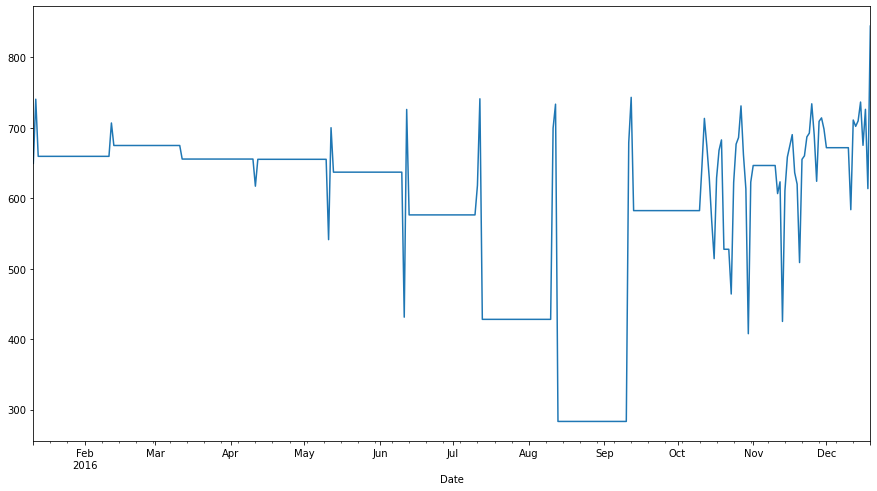

In [21]:
y.plot(figsize=(15,8))
plt.show()


In [22]:
import statsmodels.api as sm

 from this we can see that there is a seasonality 

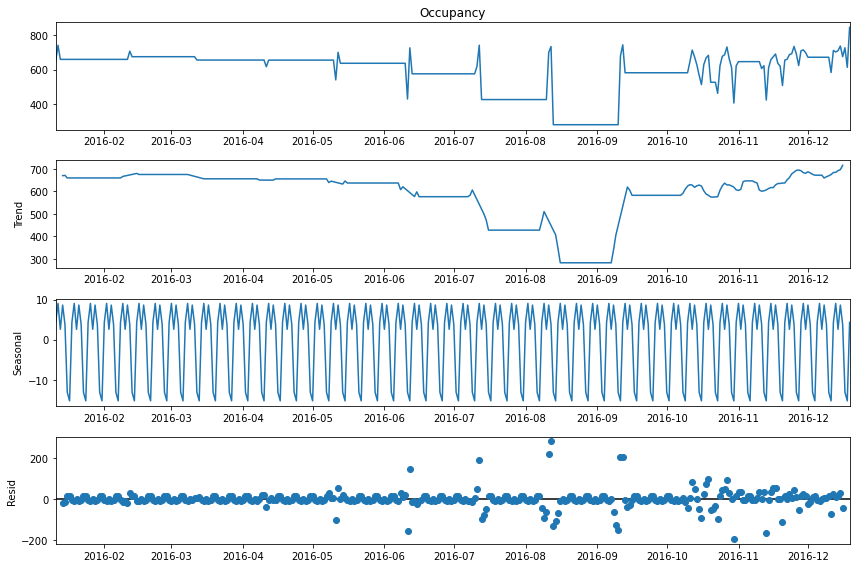

In [23]:
from pylab import rcParams
rcParams["figure.figsize"]=12,8
decomposition=sm.tsa.seasonal_decompose(y,model="additive")
fig=decomposition.plot()
plt.show()